In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import psycopg2
import os
from dotenv import load_dotenv



In [ ]:
# # import data with psycop2

# load_dotenv()

# DATABASE = os.getenv('DATABASE')
# USER_DB = os.getenv('USER_DB')
# PASSWORD = os.getenv('PASSWORD')
# HOST = os.getenv('HOST')
# PORT = os.getenv('PORT')

# conn = psycopg2.connect(
#     database=DATABASE,
#     user=USER_DB,
#     password=PASSWORD,
#     host=HOST,
#     port=PORT
# )

# cur = conn.cursor()

# query_string = """SELECT s.id 
# FROM eda.king_county_house_details d 
# LEFT JOIN eda.king_county_house_sales s 
#     ON s.house_id = d.id
# """

# df = pd.read_sql(query_string, conn)
# conn.close()

C:\Users\robin\AppData\Local\Temp\ipykernel_19588\3794402182.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_string, conn)


In [36]:
# import data with sqlalchemy but it is not working

from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()
DB_STRING = os.getenv('DB_STRING')
db = create_engine(DB_STRING)

query_string = """SELECT * 
FROM eda.king_county_house_details d 
LEFT JOIN eda.king_county_house_sales s 
    ON s.house_id = d.id
"""

df = pd.read_sql(query_string, db)
df.to_csv('eda.csv',index=False)

In [31]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,7237550310,6
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0,1321400060,7
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0,2008000270,8
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,2414600126,9
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0,3793500160,10


<Axes: xlabel='sqft_delta', ylabel='Count'>

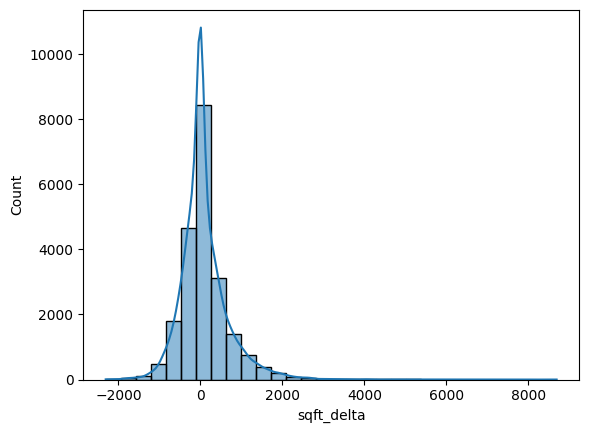

In [34]:
df[["id", "sqft_living", "sqft_living15"]]
df["sqft_delta"] = df["sqft_living"] - df["sqft_living15"]
sns.histplot(df["sqft_delta"], kde=True, bins=30)